In [1]:
import numpy as np
import Pk_library as PKL
import matplotlib.pyplot as plt

# Compare Quijote to BORG (2LPT and PM)

In [2]:
def compute_pk(delta, boxsize=1000, MAS='CIC'):

    Pk = PKL.Pk(delta.astype(np.float32), boxsize, axis=0, MAS=MAS, threads=1, verbose=False)
    k3D      = Pk.k3D
    Pk3D     = Pk.Pk[:,0]
    
    return k3D, Pk3D


def compute_crossk(delta1, delta2, boxsize=1000, MAS=['CIC','CIC']):
    
    Pk = PKL.XPk([delta1.astype(np.float32),delta2.astype(np.float32)], boxsize, 0, MAS=MAS, threads=1)
    
    k      = Pk.k3D
    Pk0_1  = Pk.Pk[:,0,0]  #monopole of field 1
    Pk0_2  = Pk.Pk[:,0,1]  #monopole of field 2
    Pk0_X  = Pk.XPk[:,0,0] #monopole of 1-2 cross P(k)
    
    r = Pk0_X / np.sqrt(Pk0_1 * Pk0_2)
    
    return k, Pk0_1, Pk0_2, r


Computing power spectra of the fields...
Time FFTS = 0.08
Time loop = 0.06
Time taken = 0.14 seconds

Computing power spectra of the fields...
Time FFTS = 0.08
Time loop = 0.06
Time taken = 0.14 seconds


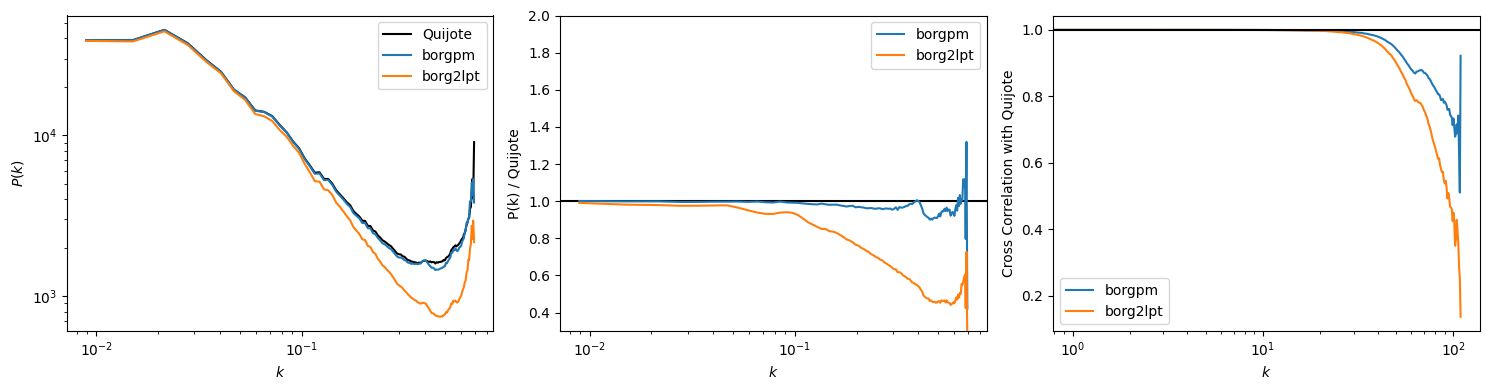

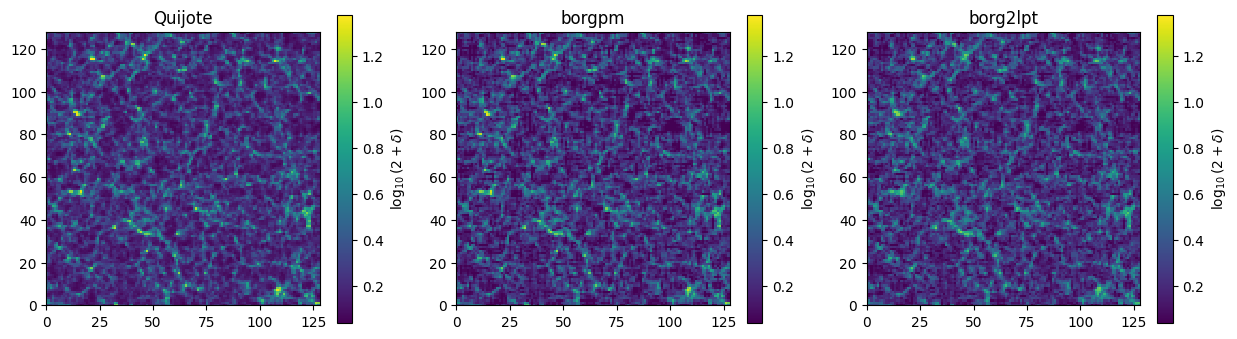

In [3]:
simnum = 3
N = 128
quijote_dir = '/home/mattho/data/quijote/density_field/latin_hypercube/'
cmass_dir = '/data101/bartlett/ili/cmass/quijote_z0/'
L = 1000

all_gravity_model = ['borgpm', 'borg2lpt']

quijote_field = np.load(f'{quijote_dir}/{simnum}/df_m_{N}_z=0.npy')
all_field = [np.load(f'{cmass_dir}/{gravity_model}/L{L}-N{N}/{simnum}/rho.npy') for gravity_model in all_gravity_model]

k, Pk0_quijote = compute_pk(quijote_field, boxsize=L, MAS='CIC')

fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs[0].loglog(k, Pk0_quijote, color='k', label='Quijote')
axs[0].set_ylabel(r'$P(k)$')
axs[1].axhline(1, color='k')
axs[1].set_ylabel('P(k) / Quijote')

for name, field in zip(all_gravity_model, all_field):
    _, Pk0, _, r = compute_crossk(field, quijote_field, boxsize=L)
    axs[0].loglog(k, Pk0, label=name)
    axs[1].semilogx(k, Pk0 / Pk0_quijote, label=name)
    axs[2].semilogx(r, label=name)

axs[1].set_ylim(0.7, 1.3)
axs[1].set_ylim(0.3, 2)
axs[2].axhline(1, color='k')
axs[2].set_ylabel('Cross Correlation with Quijote')
for ax in axs:
    ax.set_xlabel(r'$k$')
    ax.legend()
fig.tight_layout()

fig, axs = plt.subplots(1, 1+len(all_field), figsize=(5*(1+len(all_field)),4))

vmin = np.amin(np.log10(2 + quijote_field[N//2]))
vmax = np.amax(np.log10(2 + quijote_field[N//2]))

pc = axs[0].pcolor(np.log10(2 + quijote_field[N//2]), vmin=vmin, vmax=vmax)
cb = fig.colorbar(pc, ax=axs[0])
cb.set_label(r'$\log_{10}(2 + \delta)$')
axs[0].set_title('Quijote')

for i, (name, field) in enumerate(zip(all_gravity_model, all_field)):
    pc = axs[i+1].pcolor(np.log10(2 + field[N//2]), vmin=vmin, vmax=vmax)
    cb = fig.colorbar(pc, ax=axs[i+1])
    cb.set_label(r'$\log_{10}(2 + \delta)$')
    axs[i+1].set_title(name)

for ax in axs:
    ax.set_aspect('equal')